In [ ]:
# a execução da cada bloco de código é por meio de Shift+Enter

import pandas
import numpy as np
import sklearn
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

print(f'A versão do Numpy é {np.__version__};\n'
      f'A versão do Pandas é {pandas.__version__};\n'
      f'A versão do Scikit-Learn é {sklearn.__version__};\n'
      f'A versão do Matplotlib é {matplotlib.__version__}.')

A versão do Numpy é 1.19.5;
A versão do Pandas é 1.1.5;
A versão do Scikit-Learn é 0.22.2.post1;
A versão do Matplotlib é 3.2.2.


In [ ]:
"""
O banco de dados é disponibilizado em https://drive.google.com/file/d/1DN2frA0_iuFfLcj4mHZGmmrL2oAN46ee/view?usp=sharing para dowload.
Após o dowload do arquivo, deve-se fazer o upload do banco de dados clicando em "Escolher arquivos" (logo abaixo), escolher e fazer o
upload do arquivo "tbr_data.xlsx" para o Google Colab
"""
from google.colab import files
files.upload()

Saving tbr_data.xlsx to tbr_data.xlsx


{'tbr_data.xlsx': b'PK\x03\x04\x14\x00\x08\x08\x08\x00K\xb8\xe9R\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00xl/drawings/drawing1.xml\x9d\xd0]n\xc20\x0c\x07\xf0\x13\xec\x0eU\xdeiZ\x18\x13C\x14^\xd0N0\x0e\xe0%n\x1b\x91\x8f\xca\x0e\xa3\xdc~\xd1J6i{\x01\x1em\xcb?\xf9\xef\xcdnt\xb6\xf8Db\x13|#\xea\xb2\x12\x05z\x15\xb4\xf1]#\x0e\xefo\xb3\x95(8\x82\xd7`\x83\xc7F\\\x90\xc5n\xfb\xb4\x195\xad\xcf\xbc\xa7"\xed{^\xa7\xb2\x11}\x8c\xc3ZJV=:\xe02\x0c\xe8\xd3\xb4\r\xe4 \xa6\x92:\xa9\t\xceIvV\xce\xab\xeaE\xf2@\x08\x9a{\xc4\xb8\x9f&\xe2\xea\xc1\x03\x9a\x03\xe3\xf3\xfeM\xd7\x84\xb65\n\xf7A\x9d\x1c\xfa8!\x84\x16b\xfa\x05\xf7f\xe0\xac\xa9\x07\xaeQ=P\xfc\x01\xc6\x7f\x823\x8a\x02\x876\x96*\xb8\xeb)\xd9HB\xfd<\t8\xfe\x1a\xf5\xdd\xc8R\xbe\xca\xd5_\xc8\xdd\x14\xc7\x01\x1dO\xc3,\xb9Cz\xc8\x87\xb1&^\xbe\x93eFw\xee\x81\xb7h\x03\x1d\x81\xcb\xc8\xb88\xf8\xe3\xdd\xb1*\xc96\xb5(+l\xb1^\xde\xad\xcc\xb3"\xb7_PK\x07\x08\x07bi\x83\x05\x01\x00\x00\x07\x03\x00\x00PK\x03\x04\x14\x00\x08\x08\x08\x00K\xb8\x

In [ ]:
"""
Para uma leitura correta, o arquivo baixado e posteriormente introduzido no ambiente do Google Colab (upload)
deve ser EXATAMENTE o mesmo nome da variável 'arquivo'
"""
arquivo = 'tbr_data.xlsx'

In [ ]:
"""
Demonstração das 5 primeiras amostras da base de dados corelacionado ao F- (íon flúor) com
valores de composição química em porcentagem em peso (%) e o TBr (Break temperature) em graus Celsius (°C)
"""
dadosF = pandas.read_excel(arquivo, sheet_name = 'Fp')
dadosF.head()

,Reference,Sample,CaO,SiO2,Al2O3,MgO,Na2O,Li2O,B2O3,MnO,TiO2,FeO,K2O,Cr2O3,F,Tbr
0,Wang et al. (2018),1,32.71,33.88,3.72,0.0,14.25,0.0,0.00,0.00,0,0,0,0.00,12.74,1029
1,Wang et al. (2018),2,31.13,32.35,3.68,0.0,14.24,0.0,0.00,1.11,0,0,0,2.12,12.72,1057
2,Wang et al. (2018),3,29.66,30.79,3.71,0.0,14.22,0.0,3.00,1.12,0,0,0,2.12,12.71,951
3,Wang et al. (2018),4,30.92,29.37,3.62,0.0,14.29,0.0,3.01,1.11,0,0,0,2.11,12.81,973
4,Wang et al. (2018),5,32.19,27.99,3.61,0.0,14.35,0.0,3.01,1.10,0,0,0,2.10,12.84,995


In [ ]:
# print demonstrativo
print('A base de dados acima possui:\n'
      '—', dadosF.drop(['Reference','Sample'], axis=1).size, 'variáveis;\n'
      '—', dadosF.drop(['Reference','Sample'], axis=1).shape[0], 'diferentes amostras, com cada composição química e o seu TBr experimental;\n'
      'E', dadosF.drop(['Reference','Sample'], axis=1).shape[1], 'diferentes colunas, com 13 espécies químicas diferentes e o TBr.')

A base de dados acima possui:
— 182 variáveis;
— 13 diferentes amostras, com cada composição química e o seu TBr experimental;
E 14 diferentes colunas, com 13 espécies químicas diferentes e o TBr.


In [ ]:
"""
Demonstração das 5 primeiras amostras da base de dados correlacionado ao CaF2 (fluorita) com
valores de composição química em porcentagem em peso (%) e o TBr em graus Celsius (°C)
"""
dadosCaF2 = pandas.read_excel(arquivo, sheet_name = 'CaF2p')
dadosCaF2.head()

,Reference,Sample,CaO,SiO2,Al2O3,MgO,Na2O,Li2O,B2O3,MnO,TiO2,FeO,K2O,Cr2O3,CaF2,Tbr
0,Wang et al. (2017),1_prepared,36.8,44.9,3.5,0.0,8.2,0.0,6.6,0.0,0,0.0,0.0,0,0.0,1195
1,Wang et al. (2017),2_prepared,40.5,40.8,3.6,0.0,8.4,0.0,6.7,0.0,0,0.0,0.0,0,0.0,1175
2,Wang et al. (2017),3_prepared,47.2,36.4,3.6,0.0,6.2,0.0,6.6,0.0,0,0.0,0.0,0,0.0,1265
3,Wang et al. (2017),4_prepared,46.2,35.7,3.5,0.0,7.9,0.0,6.7,0.0,0,0.0,0.0,0,0.0,1273
4,Wang et al. (2017),C1,34.5,37.5,3.0,2.5,12.5,0.5,0.0,0.0,0,0.0,0.0,0,8.5,1170


In [ ]:
#print demonstrativo
print('A base de dados acima possui:\n'
      '—', dadosCaF2.drop(['Reference','Sample'], axis=1).size, 'variáveis\n'
      '—', dadosCaF2.drop(['Reference','Sample'], axis=1).shape[0], 'diferentes amostras, com cada composição química e o seu TBr experimental;\n'
      'E', dadosCaF2.drop(['Reference','Sample'], axis=1).shape[1], 'diferentes colunas, com 13 diferentes espécies químicas e o TBr.')

A base de dados acima possui:
— 574 variáveis
— 41 diferentes amostras, com cada composição química e o seu TBr experimental;
E 14 diferentes colunas, com 13 diferentes espécies químicas e o TBr.


In [ ]:
# leitura dos dados com F-, dos valores de Tbr e da composição química
tbr1 = pandas.read_excel(arquivo, sheet_name = 'Fp')
tbr1valores = pandas.DataFrame(tbr1.Tbr)
tbr1 = tbr1.drop(['Reference', 'Sample', 'Tbr'], axis=1).values

# normalização para a soma, de cada amostra, completar 100%
a1, a12, a2, a3 =[], [], [], []
for i in range(0,len(tbr1)):
    a1.append(tbr1[i].sum())
    for j in range(0,len(tbr1[i])):
        tbr1[i][j]=tbr1[i][j]/a1[i]

# conversão dos valores de F- para CaF2 e normalização dos valores de CaO
for i in range(0,len(tbr1)):
    a12.append(tbr1[i][12])
    tbr1[i][12]=tbr1[i][12]*(78/38)
    tbr1[i][0]=tbr1[i][0]-(tbr1[i][12]-a12[i])

# leitura dos valores de dados com CaF2 na composição, como a composição e o TBr
tbr2 = pandas.read_excel(arquivo, sheet_name = 'CaF2p')
tbr2valores = tbr2.Tbr
tbr2 = tbr2.drop(['Reference', 'Sample', 'Tbr'], axis=1).values

# normalização para a soma, de cada amostra, completar 100%
for i in range(0,len(tbr2)):
    a3.append(tbr2[i].sum())
    for j in range(0,len(tbr2[i])):
        tbr2[i][j]=tbr2[i][j]/a3[i]

# adição de tabelas de composições normalizadas e convertidas à uma tabela geral (tbrCaF2), em porcentagem em peso
tbr1 = pandas.DataFrame(tbr1)
tbr2 = pandas.DataFrame(tbr2)
tbrCaF2 = tbr2.append(tbr1)
tbrCaF2 = tbrCaF2*100

# adição de tabelas de valores de TBr, por cada composição adicionada.
tbrvalores2 = pandas.DataFrame(tbr2valores)
tbrValoresCaF2 = tbrvalores2.append(tbr1valores)

# construção de uma tabela demonstrativa com os valores de composição química e TBr, pós pré-processamento
colRename = {0:'CaO', 1:'SiO2', 2:'Al2O3', 3:'MgO', 4:'Na2O', 5:'Li2O',
             6:'B2O3', 7:'MnO', 8:'TiO2', 9:'FeO', 10:'K2O', 11:'Cr2O3', 12:'CaF2'}
tbrCaF2_2 = pandas.concat([tbrCaF2.round(2), tbrValoresCaF2], axis=1)
tbrCaF2_2 = tbrCaF2_2.rename(columns=colRename)
tbrCaF2_2.head()

,CaO,SiO2,Al2O3,MgO,Na2O,Li2O,B2O3,MnO,TiO2,FeO,K2O,Cr2O3,CaF2,Tbr
0,36.80,44.90,3.50,0.00,8.20,0.00,6.6,0.0,0.0,0.0,0.0,0.0,0.00,1195
1,40.50,40.80,3.60,0.00,8.40,0.00,6.7,0.0,0.0,0.0,0.0,0.0,0.00,1175
2,47.20,36.40,3.60,0.00,6.20,0.00,6.6,0.0,0.0,0.0,0.0,0.0,0.00,1265
3,46.20,35.70,3.50,0.00,7.90,0.00,6.7,0.0,0.0,0.0,0.0,0.0,0.00,1273
4,34.85,37.88,3.03,2.53,12.63,0.51,0.0,0.0,0.0,0.0,0.0,0.0,8.59,1170


In [ ]:
# leitura de dados de CaF2, de valores de TBr e da composição química
tbr1 = pandas.read_excel(arquivo, sheet_name = 'CaF2p')
tbr1valores = pandas.DataFrame(tbr1.Tbr)
tbr1 = tbr1.drop(['Reference', 'Sample', 'Tbr'], axis=1).values

# normalização para cada amostra somar 100%
a1, a12, a2, a3 =[], [], [], []
for i in range(0,len(tbr1)):
    a1.append(tbr1[i].sum())
    for j in range(0,len(tbr1[i])):
        tbr1[i][j]=tbr1[i][j]/a1[i]

# conversão dos valores de CaF2 a F- e dos teores de CaO respectivos
for i in range(0,len(tbr1)):
    a12.append(tbr1[i][12])
    tbr1[i][12]=tbr1[i][12]*(38/78)
    tbr1[i][0]=tbr1[i][0]+(a12[i]-tbr1[i][12])

# leitura dos valores de F-, da composição química e dos valores de TBr respectivos
tbr2 = pandas.read_excel(arquivo, sheet_name = 'Fp')
tbr2valores = tbr2.Tbr
tbr2 = tbr2.drop(['Reference', 'Sample', 'Tbr'], axis=1).values

# normalização (para a soma perfazer 100%)
for i in range(0,len(tbr2)):
    a3.append(tbr2[i].sum())
    for j in range(0,len(tbr2[i])):
        tbr2[i][j]=tbr2[i][j]/a3[i]

# adição de tabelas das composições normalizadas e convertidas, em porcentagem em peso
tbr1 = pandas.DataFrame(tbr1)
tbr2 = pandas.DataFrame(tbr2)
tbr2 = tbr2.append(tbr1)
tbrF = tbr2*100

# adição dos valores de TBr, respectivos às composições adicionadas.
tbrvalores2 = pandas.DataFrame(tbr2valores)
tbrValoresF = tbrvalores2.append(tbr1valores)

# construção de uma tabela demonstrativa com os valores de composição química e TBr, pós pré-processamento
colRename = {0:'CaO', 1:'SiO2', 2:'Al2O3', 3:'MgO', 4:'Na2O', 5:'Li2O',
             6:'B2O3', 7:'MnO', 8:'TiO2', 9:'FeO', 10:'K2O', 11:'Cr2O3', 12:'F'}
tbrF_2 = pandas.concat([tbrF.round(2), tbrValoresF], axis=1)
tbrF_2 = tbrF_2.rename(columns=colRename)
tbrF_2.head()

,CaO,SiO2,Al2O3,MgO,Na2O,Li2O,B2O3,MnO,TiO2,FeO,K2O,Cr2O3,F,Tbr
0,33.62,34.82,3.82,0.0,14.65,0.0,0.00,0.00,0.0,0.0,0.0,0.00,13.09,1029
1,31.98,33.23,3.78,0.0,14.63,0.0,0.00,1.14,0.0,0.0,0.0,2.18,13.07,1057
2,30.47,31.63,3.81,0.0,14.61,0.0,3.08,1.15,0.0,0.0,0.0,2.18,13.06,951
3,31.80,30.20,3.72,0.0,14.70,0.0,3.10,1.14,0.0,0.0,0.0,2.17,13.17,973
4,33.12,28.80,3.71,0.0,14.76,0.0,3.10,1.13,0.0,0.0,0.0,2.16,13.21,995


In [ ]:
# algoritmo por método de regressão linear por regularização L2, ou Ridge

# leitura de valores de composição (x1), de TBr (y1) e posterior modelagem matemática por regressão (regressor) e suas predições (reg1)
x1 = tbrCaF2.values
y1 = tbrValoresCaF2.values
regressor = linear_model.Ridge(alpha=2, random_state=0, solver='svd').fit(x1, y1)
reg1 = regressor.predict(x1)

# cálculos para os valores de parâmetros estatísticos estudados, para métodos de comparação de resultados
reg = reg1
b = y1
a = 1/len(b)*(np.abs((b-reg)/b))
c1 = 100*np.sum(a)
d1 = np.abs(b-reg).std()
e1 = np.mean(np.abs(b-reg))
f1 = np.abs(b-reg).max()

# print demonstrativo de valores de alguns parâmetros estatísticos estudados
print('Os resultados da regressão foram:')
print(f'Erro percentual absoluto médio de {c1.round(2)}%;')
print(f'Desvio padrão de {d1.round(2)}°C;')
print(f'Média do erro de {e1.round(2)}°C;')
print(f'Erro máximo de {f1.round(2)}°C;')
print(f'Coeficiente linear, da regressão, é de {regressor.intercept_[0].round(2)}°C;')
print(f'E os valores, de cada coeficiente, são de {regressor.coef_[0].round(2)}.')

Os resultados da regressão foram:
Erro percentual absoluto médio de 2.24%;
Desvio padrão de 18.34°C;
Média do erro de 25.79°C;
Erro máximo de 79.32°C;
Coeficiente linear, da regressão, é de 796.2°C;
E os valores, de cada coeficiente, são de [ 10.68  -0.41  -4.77 -19.31  11.56   9.46 -16.03  -0.32 -15.1   33.4
  -4.13  -1.61  -3.43].


In [ ]:
# modelo de TBr do presente estudo (aproximação dos resultados do algoritmo de regressão linear por regularizão L2)

"""
O modelo então se resulta como:
TBr (°C) = 796,2 + 10,68%CaO - 0,41%SiO2 - 4,77%Al2O3 - 19,31%MgO + 11,56%Na2O + 9,46%Li2O
           - 16,03%B2O3 - 0,32%MnO - 15,1%TiO2 + 33,4%FeO - 4,13%K2O - 1,61%Cr2O3 - 3,43%CaF2
"""
tbrS1 = tbrCaF2
tS1 = (796.2 + 10.68*tbrS1[0] - 0.41*tbrS1[1] - 4.77*tbrS1[2] - 19.31*tbrS1[3]
       + 11.56*tbrS1[4] + 9.46*tbrS1[5] - 16.03*tbrS1[6] - 0.32*tbrS1[7]
       - 15.1*tbrS1[8] + 33.4*tbrS1[9] - 4.13*tbrS1[10] - 1.61*tbrS1[11] - 3.43*tbrS1[12]).values

# valores de alguns parâmetros estatísticos
tS1 = tS1.reshape(-1,1)
reg = tS1
b = tbrValoresCaF2.values
a = 1/len(b)*(np.abs((b-reg)/b))
c2 = 100*np.sum(a)
d2 = np.abs(b-reg).std()
e2 = np.mean(np.abs(b-reg))
f2 = np.abs(b - reg).max()

# print demonstrativo de valores de alguns parâmetros estatísticos estudados
print('Os resultados do modelo Feito foram:')
print(f'O valor do erro percentual absoluto médio é de {c2.round(2)}%;')
print(f'O valor do desvio padrão é de {d2.round(2)}°C;')
print(f'O valor da média do erro é de {e2.round(2)}°C;')
print(f'O valor de erro máximo é de {f2.round(2)}°C.')

Os resultados do modelo Feito foram:
O valor do erro percentual absoluto médio é de 2.24%;
O valor do desvio padrão é de 18.37°C;
O valor da média do erro é de 25.76°C;
O valor de erro máximo é de 79.55°C.


In [ ]:
"""
Dynamic Conditions — Sridhar et al. (2000)
TBr (°C) = 1120 - 8,43%Al2O3 - 3,30%SiO2 + 8,65%CaO - 13,86%MgO - 18,40%Fe2O3
           - 3,21%MnO - 9,22%TiO2 + 22,86%K2O - 3,20%Na2O - 6,46%F
Cálculos do modelo Dynamic Conditions com os valores de TBr calculados
"""
tbrS1 = tbrF
tS1 = (1120.0 - 8.43*tbrS1[2] - 3.30*tbrS1[1] + 8.65*tbrS1[0]
       - 13.86*tbrS1[3] - 3.21*tbrS1[7] - 9.22*tbrS1[8]
       + 22.86*tbrS1[10] - 3.20*tbrS1[4] - 6.46*tbrS1[12]).values

# alguns parâmetros estatístico calculados
tS1 = tS1.reshape(-1,1)
reg = tS1
b = tbrValoresF.values
a = 1/len(b)*(np.abs((b-reg)/b))
c3 = 100*np.sum(a)
d3 = np.abs(b-reg).std()
e3 = np.mean(np.abs(b-reg))
f3 = np.abs(b - reg).max()

# print demonstrativo de valores de alguns parâmetros estatísticos estudados
print('Os resultados do Dynamic Conditions foram:')
print(f'Erro percentual absoluto médio de {c3.round(2)}%;')
print(f'Desvio padrão de {d3.round(2)}°C;')
print(f'Média do erro de {e3.round(2)}°C;')
print(f'Erro máximo de {f3.round(2)}°C.')

Os resultados do Dynamic Conditions foram:
Erro percentual absoluto médio de 8.94%;
Desvio padrão de 71.72°C;
Média do erro de 98.26°C;
Erro máximo de 340.61°C.


In [ ]:
"""
Steady State Conditions — Sridhar et al. (2000)
TBr (°C) = 1180 - 3,94%Al2O3 - 7,87%SiO2 + 11,37%CaO - 9,88%MgO
           + 24,32%Fe2O3 + 0,23%MnO - 308,7%K2O + 6,96%Na2O - 17,32%F
Cálculo dos valores de TBr pelo modelo Steady State Conditions
"""
tbrS1 = tbrF
tS2 = (1180.0 - 3.94*tbrS1[2] - 7.87*tbrS1[1] + 11.37*tbrS1[0]
       - 9.88*tbrS1[3] + 0.23*tbrS1[7] - 308.7*tbrS1[10]
       + 6.96*tbrS1[4] - 17.32*tbrS1[12]).values

# cálculos de alguns parâmetros estatísticos
tS2 = tS2.reshape(-1,1)
reg = tS2
b = tbrValoresF.values
a = 1/len(b) * (np.abs((b - reg) / b))
c4 = 100*np.sum(a)
d4 = np.abs(b - reg).std()
e4 = np.mean(np.abs(b - reg))
f4 = np.abs(b - reg).max()

# print demonstrativo de valores de alguns parâmetros estatísticos estudados
print('Os resultados do Steady State Conditions foram:')
print(f'Erro percentual absoluto médio de', c4.round(2), '%')
print(f'Desvio padrão de {d4.round(2)}°C')
print(f'Média do erro de {e4.round(2)}°C')
print(f'Erro máximo de {f4.round(2)}°C.')

Os resultados do Steady State Conditions foram:
Erro percentual absoluto médio de 14.49 %
Desvio padrão de 84.49°C
Média do erro de 163.47°C
Erro máximo de 442.73°C.


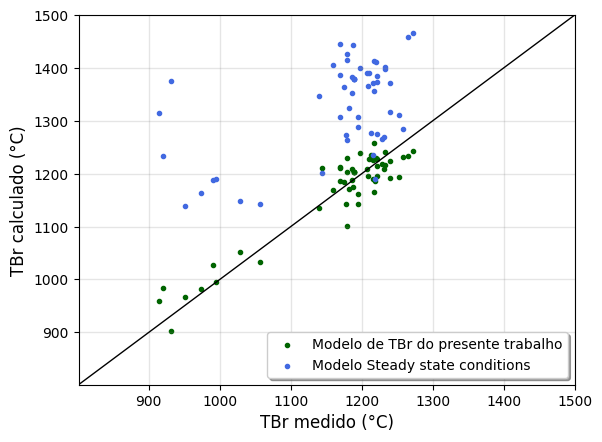

In [ ]:
"""
Gráfico que relaciona os dados dos valores de TBr pelo Steady state conditions e a do modelo do presente trabalho,
com os valores de TBr medidos experimentalmente. Ambos são correlacionados com a função identidade (y=x),
onde: TBr calculado = TBr medido
"""
plt.style.use('default')

a = range(500,1601,1)
plt.plot(a, a, color = 'black', linestyle = '-', linewidth = 1)
plt.scatter(x = tbrValoresCaF2, y = reg1, label = "Modelo de TBr do presente trabalho", marker = '.', color = 'darkgreen')
plt.scatter(x = tbrValoresF, y = tS2, label = "Modelo Steady state conditions", marker = '.', color = 'royalblue')

plt.xlabel('TBr medido (°C)', size = 12)
plt.ylabel('TBr calculado (°C)', size = 12)
plt.xlim(801, 1500)
plt.ylim(801, 1500)

plt.legend(loc='lower right', shadow=True)
plt.grid(alpha = 0.2, color='grey', linewidth=1, linestyle='-')

plt.show()

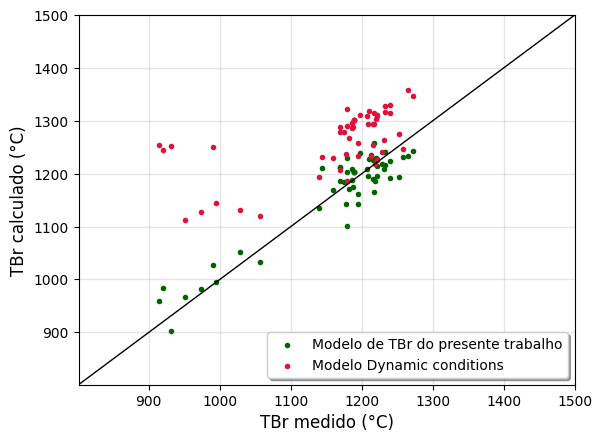

In [ ]:
"""
Gráfico que relaciona os dados dos valores de TBr pelo Dynamic Conditions e a do modelo do presente trabalho,
com os valores de TBr medidos experimentalmente. Ambos são correlacionados com a função identidade (y=x),
onde: TBr calculado = TBr medido
"""
plt.plot(a, a, color = 'black', linestyle = '-', linewidth = 1)
plt.scatter(x = tbrValoresCaF2, y = reg1, label = "Modelo de TBr do presente trabalho", marker = '.', color = 'darkgreen')
plt.scatter(x = tbrValoresF, y = tS1, label = "Modelo Dynamic conditions", marker = '.', color = 'crimson')

plt.xlabel('TBr medido (°C)', size = 12)
plt.ylabel('TBr calculado (°C)', size = 12)
plt.xlim(801, 1500)
plt.ylim(801, 1500)

plt.legend(loc='lower right', shadow=True)
plt.grid(alpha = 0.2, color='grey', linewidth=1, linestyle='-')

plt.show()

In [ ]:
# tabela final correlacionando os valores cada análise estatística com cada modelo estudado
tabela1 = {'Presente trabalho':[c2,d2,e2,f2], 'Dynamic conditions':[c3,d3,e3,f3], 'Steady state conditions':[c4,d4,e4,f4]}
tabelaFinal = pandas.DataFrame(tabela1).round(2)
tabelaFinal.index = ['Erro Percentual Absoluto Médio (%)','Desvio Padrão (°C)','Média de erro (°C)', 'Erro Máximo (°C)']
tabelaFinal.T

,Erro Percentual Absoluto Médio (%),Desvio Padrão (°C),Média de erro (°C),Erro Máximo (°C)
Presente trabalho,2.24,18.37,25.76,79.55
Dynamic conditions,8.94,71.72,98.26,340.61
Steady state conditions,14.49,84.49,163.47,442.73


In [ ]:
"""
REFERÊNCIAS

Chen, L.Y., Wen, G.H., Yang, C.L., Mei, F., Shi, C.Y., Tang, P.
Development of lowfluoride and titanium-bearing mould fluxes for medium carbon peritectic steel slab casting.
Ironmaking and Steelmaking. v. 42, n. 2, p. 105-111, 2015.

Elahipanah, Z.
Thermo-Physical Properties of Mould Flux Slags for Continuous Casting of Steel
Royal Institute of Technology, Sweden. 2012.

Long, X., He, S-P., Xu, J-F., Huo, X-L., Wang, Q.
Properties of High Basicity Mold Fluxes for Peritectic Steel Slab Casting.
Journal of Iron and Steel Research Internacional. v. 19, n. 7, p. 39-45, 2012.

Sridhar, S., Mills, K.K., Afrange, O.D.C., Lörz, H.P., Carli, R.
Break temperatures of mould fluxes and their relevance to continuous casting.
Ironmaking and Steelmaking. v. 27, p. 238-242, 2000.

Wang, L., Zhang, C., Cai, D., Zhang, J., Sasaki, Y., Ostrovski, O.
Effects of CaO/SiO2 Ratio and Na2O Content on Melting Properties and Viscosity of SiO2-CaO-Al2O3-B2O3-Na2O Mold Fluxes.
Metallurgical and Materials Transactions B. v. 48B, p. 516-526, 2017.

Wang, W., Yu, J., Zhou, L., Wu, Z., Li, H.
Optimization of Mold Flux for the Continuous Casting of Cr-Contained Steels.
Metallurgical and Materials Transactions B. v. 49B, p. 1580-1587, 2018.

Yeo, T., Cho, J., Alloni, M., Casagrande, S., Carli, R.
Structure and its effect on viscosity of fluorine-free mold flux: Substituting CaF2 with B2O3 and Na2O.
Journal of Non-Crystalline Solids. v. 529, 119756. 2020.

Zhou, L., Wang, W.
The Development of CaO-SiO2-B2O3-based Fluorine-Free Mold Flux for a Continuous Casting Process.
Metallurgical and Materials Transactions E. v. 3E, p. 139-144, 2016.
"""